In [1]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00


In [2]:
from huggingface_hub import login
login()

In [3]:
from datasets import load_dataset
ds=load_dataset("rotten_tomatoes")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [6]:
ds['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [7]:
ds['train'][0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [9]:
next(iter(ds['train']))

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [11]:
ds['validation']['text'][0]

'compassionately explores the seemingly irreconcilable situation between conservative christian parents and their estranged gay and lesbian children .'

In [13]:
ds['validation'][0]['text']

'compassionately explores the seemingly irreconcilable situation between conservative christian parents and their estranged gay and lesbian children .'

In [14]:
#slicing
ds['validation']

Dataset({
    features: ['text', 'label'],
    num_rows: 1066
})

In [18]:
ds['validation'][10:20:2]  #start #end #step

{'text': ["a mischievous visual style and oodles of charm make 'cherish' a very good ( but not great ) movie .",
  '[a] strong piece of work .',
  "the importance of being earnest , so thick with wit it plays like a reading from bartlett's familiar quotations",
  'made for teens and reviewed as such , this is recommended only for those under 20 years of age . . . and then only as a very mild rental .',
  'the film does give a pretty good overall picture of the situation in laramie following the murder of matthew shepard .'],
 'label': [1, 1, 1, 1, 1]}

In [19]:
ds['train'][-1]

{'text': 'things really get weird , though not particularly scary : the movie is all portent and no content .',
 'label': 0}

In [21]:
ds['train'][-5:-1]

{'text': ['any enjoyment will be hinge from a personal threshold of watching sad but endearing characters do extremely unconventional things .',
  "if legendary shlockmeister ed wood had ever made a movie about a vampire , it probably would look a lot like this alarming production , adapted from anne rice's novel the vampire chronicles .",
  "hardly a nuanced portrait of a young woman's breakdown , the film nevertheless works up a few scares .",
  'interminably bleak , to say nothing of boring .'],
 'label': [0, 0, 0, 0]}

In [24]:
ds['validation'][20:10:-1]

{'text': ["ferrara's best film in years .",
  "both lead performances are oscar-size . quaid is utterly fearless as the tortured husband living a painful lie , and moore wonderfully underplays the long-suffering heroine with an unflappable '50s dignity somewhere between jane wyman and june cleaver .",
  'the film does give a pretty good overall picture of the situation in laramie following the murder of matthew shepard .',
  "imagine o . henry's <b>the gift of the magi</b> relocated to the scuzzy underbelly of nyc's drug scene . merry friggin' christmas !",
  'made for teens and reviewed as such , this is recommended only for those under 20 years of age . . . and then only as a very mild rental .',
  'daring and beautifully made .',
  "the importance of being earnest , so thick with wit it plays like a reading from bartlett's familiar quotations",
  "a stirring tribute to the bravery and dedication of the world's reporters who willingly walk into the nightmare of war not only to record

In [25]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [27]:
ds=load_dataset("rotten_tomatoes",split="train")
ds

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

In [32]:
ds=load_dataset("rotten_tomatoes",split="train[:10%]")
ds

Dataset({
    features: ['text', 'label'],
    num_rows: 853
})

In [29]:
ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [33]:
emotion_ds=load_dataset('dair-ai/emotion')

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [36]:
emotion_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [35]:
split_db=emotion_ds['train'].train_test_split(test_size=0.2)
split_db

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 12800
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3200
    })
})

In [ ]:
# array
# list
# numpy  !pip install numpy
# tensor !pip install tensorflow torch  #import pytorch
# parquet

In [37]:
split_db['train']['text']

['i can see a lot of strain on people i can tell they are feeling pretty shitty or not what they are supposed to be pretending',
 'i feel privileged to have read the stories i received and i enjoyed crafting a piece that i believe does justice to new zealand women screenwriters who write feature films',
 'i feel too much but i don t care no i don t careeeeee i don t care by savage garden your three plans for tomorrow',
 'i feel fabulous about it',
 'i made this i felt some relief from the fear and anxiety but i started feeling pissed again with a whole new set of memories',
 'i talk to dogs as i feel they cannot understand words but they can read emotions and know how to be supportive i decided i should go home',
 'i love you and i feel so blessed to spend another year with you',
 'im just feeling bashful whenever i talk to you',
 'i feel very thrilled about the move and would hope that we eventually build up a superbike cbs sportsline the irl expands to races in three more than in',
 

In [38]:
!pip install pandas


In [41]:
import pandas as pd
df_train=split_db['train'].to_pandas()  #parquet to pandas

In [42]:
df_train

,text,label
0,i can see a lot of strain on people i can tell...,0
1,i feel privileged to have read the stories i r...,1
2,i feel too much but i don t care no i don t ca...,3
3,i feel fabulous about it,1
4,i made this i felt some relief from the fear a...,3
...,...,...
12795,i am feeling overwhelmed by daily responsibili...,5
12796,i am feeling soooooooo giggly,1
12797,i feel an urgency to introduce readers to the ...,5
12798,i feel very proud of my girls accomplishments ...,1


<Axes: xlabel='label'>

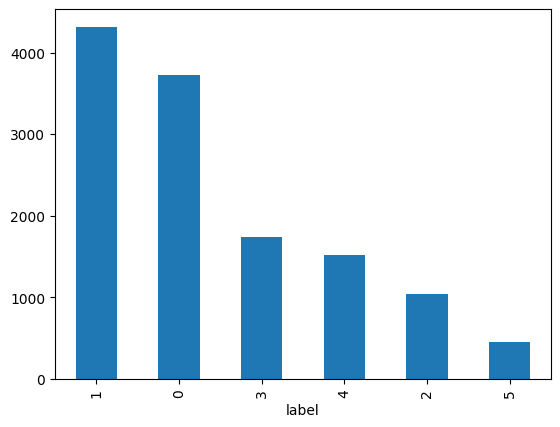

In [44]:
df_train['label'].value_counts().plot(kind='bar')

In [45]:
split_db['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [46]:
df_train['text']

,text
0,i can see a lot of strain on people i can tell...
1,i feel privileged to have read the stories i r...
2,i feel too much but i don t care no i don t ca...
3,i feel fabulous about it
4,i made this i felt some relief from the fear a...
...,...
12795,i am feeling overwhelmed by daily responsibili...
12796,i am feeling soooooooo giggly
12797,i feel an urgency to introduce readers to the ...
12798,i feel very proud of my girls accomplishments ...


In [52]:
df_train[df_train['label']>3]

,text,label
7,im just feeling bashful whenever i talk to you,4
10,i want to feel amazed a little more often,5
11,i don t usually blog when i m feeling this way...,5
12,im feeling nervous but since it wasnt sore to ...,4
13,i didnt have to convince myself he was my soul...,4
...,...,...
12772,im drunk for example i feel a lot less shy abo...,4
12775,i have a heart to serve to better their situat...,4
12785,ive decided to intentionally make it easier on...,4
12795,i am feeling overwhelmed by daily responsibili...,5


In [64]:
df_train[df_train['text'].str.contains('feeling')]

,text,label
0,i can see a lot of strain on people i can tell...,0
4,i made this i felt some relief from the fear a...,3
7,im just feeling bashful whenever i talk to you,4
11,i don t usually blog when i m feeling this way...,5
12,im feeling nervous but since it wasnt sore to ...,4
...,...,...
12787,i guess i m feeling a bit nostalgic,2
12790,i tired of hearing of these unique communicati...,1
12791,i am feeling happy,1
12795,i am feeling overwhelmed by daily responsibili...,5


In [60]:
df_train[df_train['text'].apply(lambda x:'feeling' in x)]

,text,label
0,i can see a lot of strain on people i can tell...,0
4,i made this i felt some relief from the fear a...,3
7,im just feeling bashful whenever i talk to you,4
11,i don t usually blog when i m feeling this way...,5
12,im feeling nervous but since it wasnt sore to ...,4
...,...,...
12787,i guess i m feeling a bit nostalgic,2
12790,i tired of hearing of these unique communicati...,1
12791,i am feeling happy,1
12795,i am feeling overwhelmed by daily responsibili...,5


<Axes: xlabel='label'>

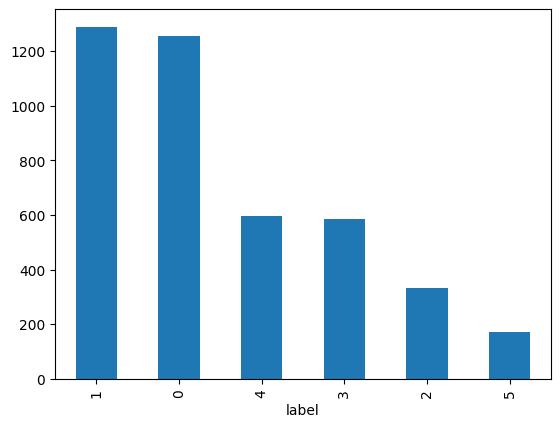

In [62]:
df_train[df_train['text'].apply(lambda x:'feeling' in x)]['label'].value_counts().plot(kind='bar')

In [57]:
df_train['text'].apply(lambda x:len(x.split(' '))).max()

64

In [66]:
# panda to parqet
from datasets import Dataset
par_db=Dataset.from_pandas(df_train)
par_db

Dataset({
    features: ['text', 'label'],
    num_rows: 12800
})

In [69]:
par_db.filter(lambda x:x["text"].startswith('i'))

Filter:   0%|          | 0/12800 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label'],
    num_rows: 12676
})

In [70]:
par_db.filter(lambda x:'feeling' in x["text"])

Filter:   0%|          | 0/12800 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label'],
    num_rows: 4233
})